In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Stress to Strain')

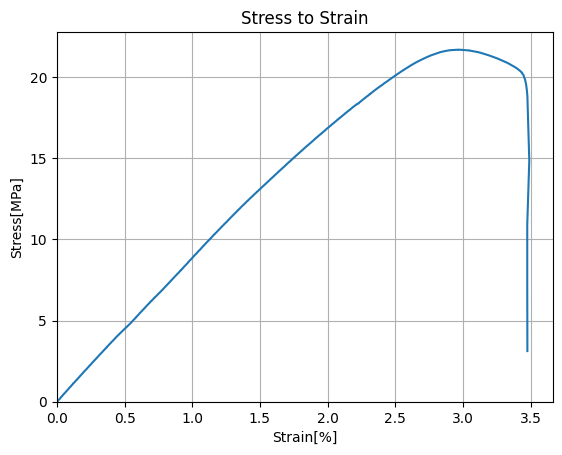

In [91]:
#strain to stress
df_0 = pd.read_csv('strain to stress.csv')
df_0 = df_0[df_0['Stress( MPa) '] >= 0]
df_0['avg'] = (df_0['Stress( MPa) '] + df_0['Stress( MPa) '].shift(-1)) / 2
x = df_0['Strain( %) ']
y = df_0['Stress( MPa) ']
#y_avg = df_0['Stress( MPa) ']
plt.plot(x.to_numpy(), y.to_numpy())
plt.grid(True)
plt.xlabel('Strain[%]')
plt.ylabel('Stress[MPa]')
plt.axis([0, None, 0, None])
plt.title('Stress to Strain')

young value:  838.0 [Mpa]


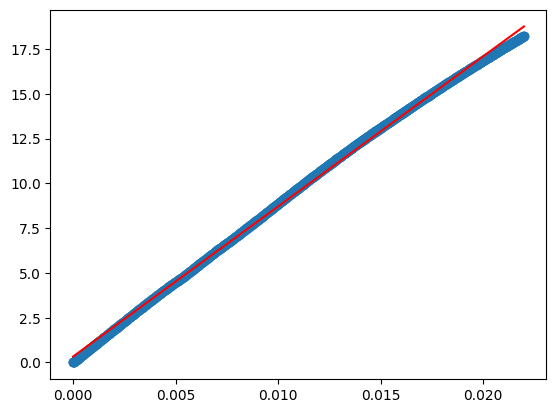

In [92]:
#modules young
df_0 = df_0[(df_0['Strain( %) '] < 2.2)]
x = df_0['Strain( %) ']/100
y = df_0['Stress( MPa) ']
coefficients = np.polyfit(x, y, 1)
fit_function = np.poly1d(coefficients)
fit_line = fit_function(x)


# Plot the original data points
plt.scatter(x, y, label='Original Data')

# Plot the fitted line
plt.plot(x, fit_line, color='red', label='Linear Fit')

print ("young value: " , np.round(coefficients[0]), "[Mpa]")

Smoothed_avg equation is:  -0.00013824312439875768 x^2+ -0.03670673502899248 x+ -0.08228487219234795
Smoothed_min equation is:  -0.00018540186349077982 x^2+ -0.05491902440069707 x+ -0.20861914980662516
Smoothed_max equation is:  -9.108438530673552e-05 x^2+ -0.01849444565728786 x+ 0.044049405421928846


Text(0.5, 1.0, 'Displacement in x over time')

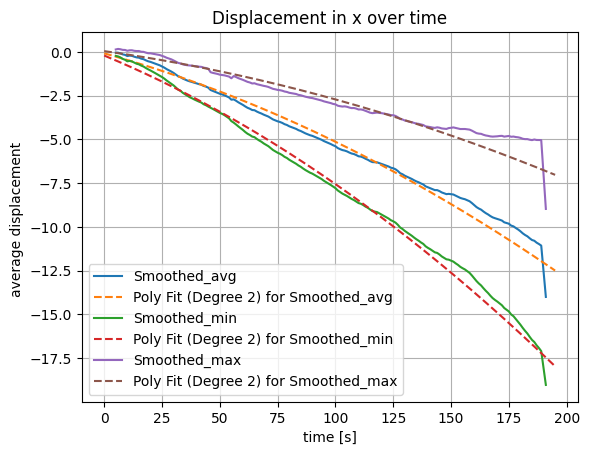

In [93]:
df_1 = pd.read_csv('displacement_x.csv')
x= df_1["Time [s]"]
df_1['avg'] = df_1[["Surface component 1.min(d)X [mm]","Surface component 1.max(d)X [mm]"]].mean(axis=1)
plt.xlabel('time [s]')
plt.ylabel('average displacement ')
df_1['Smoothed_avg'] = df_1['avg'].rolling(window=10, center=True).mean()
df_1['Smoothed_min'] = df_1["Surface component 1.min(d)X [mm]"].rolling(window=10, center=True).mean()
df_1['Smoothed_max'] = df_1["Surface component 1.max(d)X [mm]"].rolling(window=10, center=True).mean()
A = ["Smoothed_avg", 'Smoothed_min', 'Smoothed_max', "avg","Surface component 1.min(d)X [mm]","Surface component 1.max(d)X [mm]" ]
x_fit = np.linspace(0, 200, 1000)
i = 0

while i <  3 :
    plt.plot(x , (df_1[A[i]].to_numpy()) , label = A[i])
    degree = 2  # Choose the degree of the polynomial fit
    coefficients = np.polyfit(x, df_1[A[i+3]], degree)
    print(A[i], "equation is: " , coefficients[0] , "x^2+", coefficients[1] , "x+", coefficients[2] )
    poly_function = np.poly1d(coefficients)


    # Generate points along the x-axis for plotting the fitted curve
    x_fit = np.linspace(min(x), max(x), 1000)

    # Plot the polynomial fit line
    plt.plot(x_fit, poly_function(x_fit), label=f'Poly Fit (Degree {degree}) for {A[i]}', linestyle='--')
    i +=1
plt.legend()
plt.grid(True)
plt.title('Displacement in x over time')


Smoothed_avg equation is:  -0.00033432133076379943 x^2+ 0.10191658567374501 x+ -0.17428667261120065
Smoothed_min equation is:  -0.00034643461160135307 x^2+ 0.10271636277340822 x+ -0.48824401797290384
Smoothed_max equation is:  -0.00032220804992624596 x^2+ 0.10111680857408188 x+ 0.13967067275050227


Text(0.5, 1.0, 'Displacement in y over time')

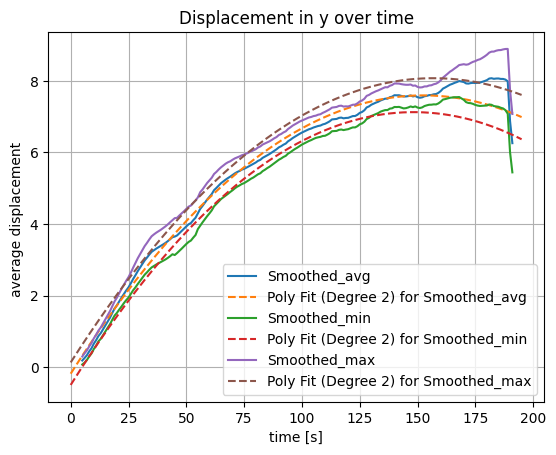

In [94]:
df_1 = pd.read_csv('displacement_y.csv')
x= df_1["Time [s]"]
df_1['avg'] = df_1[["Surface component 1.min(d)Y [mm]","Surface component 1.max(d)Y [mm]"]].mean(axis=1)
plt.xlabel('time [s]')
plt.ylabel('average displacement ')
df_1['Smoothed_avg'] = df_1['avg'].rolling(window=10, center=True).mean()
df_1['Smoothed_min'] = df_1["Surface component 1.min(d)Y [mm]"].rolling(window=10, center=True).mean()
df_1['Smoothed_max'] = df_1["Surface component 1.max(d)Y [mm]"].rolling(window=10, center=True).mean()
A = ["Smoothed_avg", 'Smoothed_min', 'Smoothed_max', "avg","Surface component 1.min(d)Y [mm]","Surface component 1.max(d)Y [mm]" ]
x_fit = np.linspace(0, 200, 1000)
i = 0

while i <  3 :
    plt.plot(x , (df_1[A[i]].to_numpy()) , label = A[i])
    degree = 2  # Choose the degree of the polynomial fit
    coefficients = np.polyfit(x, df_1[A[i+3]], degree)
    print(A[i], "equation is: " , coefficients[0] , "x^2+", coefficients[1] , "x+", coefficients[2] )
    poly_function = np.poly1d(coefficients)


    # Generate points along the x-axis for plotting the fitted curve
    x_fit = np.linspace(min(x), max(x), 1000)

    # Plot the polynomial fit line
    plt.plot(x_fit, poly_function(x_fit), label=f'Poly Fit (Degree {degree}) for {A[i]}', linestyle='--')
    i +=1
plt.legend()
plt.grid(True)
plt.title('Displacement in y over time')


equation is:  0.011298163635059644 x+ -0.14554928094892783


Text(0.5, 1.0, 'strain in x over time')

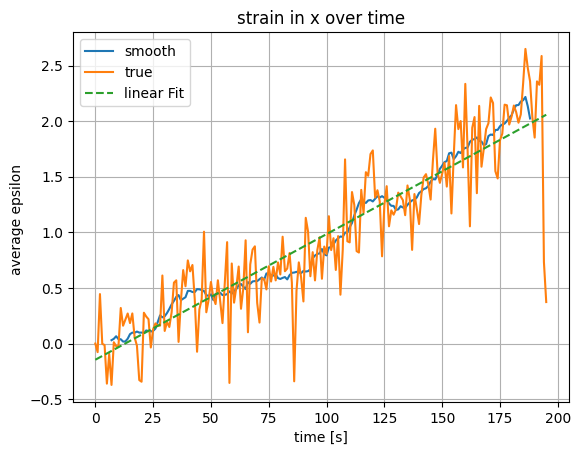

In [95]:
#graph of strain vs time
df_3 = pd.read_csv('epsilon_x.csv')
plt.xlabel('time [s]')
plt.ylabel('average epsilon ')
df_3['Smoothed_eps'] = df_3['Surface component 1.avg(epsX) [%]'].rolling(window=15, center=True).mean()
plt.plot( df_3["Time [s]"], (df_3['Smoothed_eps'].to_numpy()) , label = 'smooth')
plt.plot( df_3["Time [s]"], (df_3['Surface component 1.avg(epsX) [%]'].to_numpy()) , label = 'true')
degree =  1 
coefficients = np.polyfit(df_3["Time [s]"], df_3['Surface component 1.avg(epsX) [%]'], degree)
print( "equation is: " , coefficients[0] , "x+", coefficients[1]  )
poly_function = np.poly1d(coefficients)


    # Generate points along the x-axis for plotting the fitted curve
x_fit = np.linspace(min(df_3["Time [s]"]), max(df_3["Time [s]"]), 1000)

    # Plot the polynomial fit line
plt.plot(x_fit, poly_function(x_fit), label=f'linear Fit', linestyle='--')
plt.legend()
plt.grid(True)
plt.title('strain in x over time')

equation is:  -0.0029764306289794323 x+ 0.24376953734590276


Text(0.5, 1.0, 'strain in y over time')

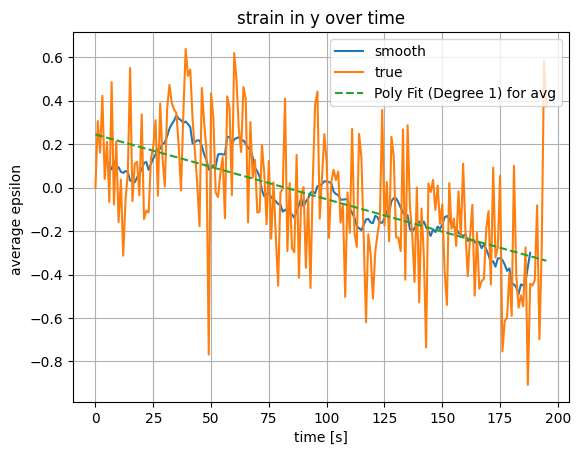

In [96]:
#graph of strain vs time
df_3 = pd.read_csv('epsilon_y.csv')
plt.xlabel('time [s]')
plt.ylabel('average epsilon ')
df_3['Smoothed_eps'] = df_3['Surface component 1.avg(epsY) [%]'].rolling(window=15, center=True).mean()
plt.plot( df_3["Time [s]"], (df_3['Smoothed_eps'].to_numpy()) , label = 'smooth')
plt.plot( df_3["Time [s]"], (df_3['Surface component 1.avg(epsY) [%]'].to_numpy()) , label = 'true')
degree =  1 
coefficients = np.polyfit(df_3["Time [s]"], df_3['Surface component 1.avg(epsY) [%]'], degree)
print( "equation is: " , coefficients[0] , "x+", coefficients[1]  )
poly_function = np.poly1d(coefficients)


    # Generate points along the x-axis for plotting the fitted curve
x_fit = np.linspace(min(df_3["Time [s]"]), max(df_3["Time [s]"]), 1000)

    # Plot the polynomial fit line
plt.plot(x_fit, poly_function(x_fit), label=f'Poly Fit (Degree {degree}) for {A[i]}', linestyle='--')
plt.legend()
plt.grid(True)
plt.title('strain in y over time')